# Plots, matrices, and randomization

## 0 - Recap of previous tutorial

In the previous tutorial, we have explored the basic concepts of Julia, which include but are not limited to:
* Creation of variables.
* Basic algebraic operations with variables.
* Definition of functions.
* Handling of arrays and matrices.
* Basic software concepts in Julia:
    * *if ... else* statements.
    * *for* loops.
    * *while* loops.

We have also installed the following Julia packages in the process:
* LinearAlgebra
* Random
* Plots

If you have not installed these prerequisite packages, go into a Julia terminal (by running "julia" if you have it installed in your PATH or by opening the Julia application), then type the "`]`" key to enter package mode, then use the command "`add <PackageName>`" for all of the aforementioned packages. To exit Package Mode, press the backspace button (alternatively, ctrl+c interrupt) to delete the invisible "`]`".

In this tutorial, we will be briefly exploring the functionality of all three of these packages.

**Disclaimer:** You may have noticed that in the previous tutorial, we have used semicolons to indicate end of line as normally used in other programming languages such as Matlab or C++. Using semicolons is optional in Julia.

## 1 - Introduction to Plots.jl

*If you have not installed Plots.jl so far, follow the steps in Part 0 to install the prerequisite packages*

If in doubt, please consult the Julia Plots manual and tutorials at this link: https://docs.juliaplots.org/stable/

### First plot!

First, you can initialize Plots.jl by running the following line:

In [1]:
using Plots

This initialization line, like others of its kind, must be placed before other lines to ensure that all packages are loaded before they are accessed. Once Plots.jl is initialized, we can test it out as follows (some delay may be expected for your first plot):

We can create a **series** (another name for column vectors but with respect to Plots.jl) of 50 x-values from -10 to 10 such that the interval `[-10,10]` is divided into equally small segments, or sub-intervals. We can apply a function to this series to obtain a new series of y-values, which we can plot against our x-values. Note that we need to add a dot after the sin (hence `sin.(x)`) to ensure that the sine function is applied element-wise in Julia.

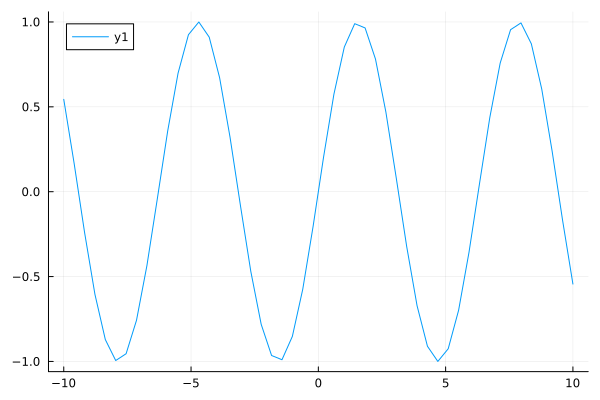

In [2]:
x = range(-10, 10, length=50)
x1 = -10:1:10;
y = sin.(x)
plot(x, y)

Since we chose to plot using a `range()` length of only 50, our sine graph appears to have lost some precision at its peaks and troughs (can you guess why?).

### More ~~lines~~ curves!

We can look at a similar example but with multiple functions, and a length of 100:

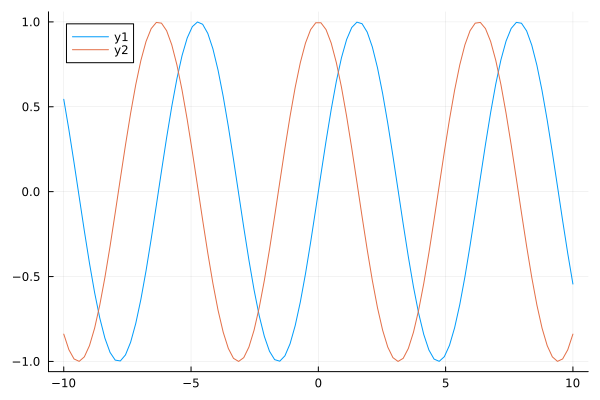

In [3]:
x = range(-10, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
plot(x, [y1 y2])

Note that instead of giving `plot()` a y-valued series, we have given it the 100x2 matrix `[y1 y2]`. `plot()` also accepts matrices, and in this case, we have given it a matrix that represents two functions with its columns and 100 series elements per function with its rows.

What about functions with more transformations? For example, if we needed to plot the function `3*sin(2*x)^2+2`, we would need to add dots as follows in order to tell Julia that we need to apply these transformations element-wise: `3 .* sin(2 .* x) .^2 .+ 2`. This can get tedious fast, so we can use the `@.` Julia macro (a simple instruction to automate things for us) as follows:

In [4]:
y3 = @. 3*sin(2*x)^2+2

100-element Vector{Float64}:
 4.500407092478393
 3.383135084724704
 2.3381119573780635
 2.0113977428477696
 2.6049755269665282
 3.7518803379457193
 4.743066280090261
 4.965756846212729
 4.28227903118871
 3.1151763058470485
 2.1859814332699177
 2.0691464555053862
 2.8369017448254494
 ⋮
 2.0691464555053862
 2.1859814332699177
 3.1151763058470485
 4.28227903118872
 4.965756846212733
 4.743066280090255
 3.7518803379457193
 2.60497552696652
 2.0113977428477683
 2.33811195737807
 3.383135084724714
 4.500407092478393

Again, note that this type of command outputs a vector/series, which can be conveniently plotted using Plots.jl. Now, we can run the `plot!()` command to modify the current plot with `y3` instead of starting a new one using `plot()`:

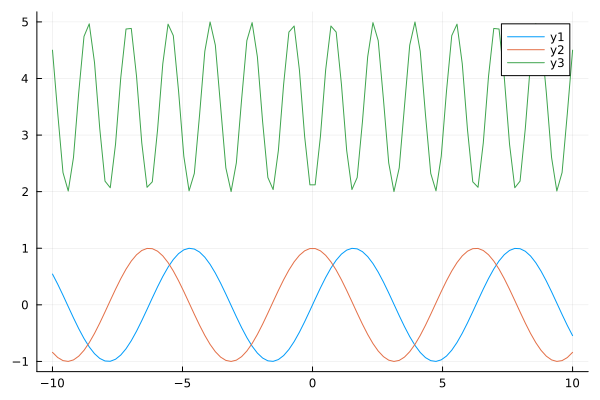

In [5]:
plot!(x, y3)

We can also pass existing plots as a variable instead:

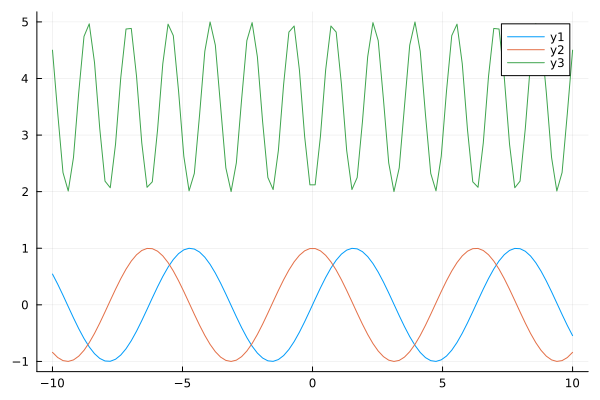

In [6]:
x = range(-10, 10, length=100)
y1 = sin.(x)
y2 = cos.(x)
old_plot = plot(x, [y1 y2])
y3 = @. 3*sin(2*x)^2+2
new_plot = plot(old_plot, x, y3)

### Attributes

In Plots.jl, plots can be modified further through modifiers called **attributes** (more info can be found here: https://docs.juliaplots.org/stable/attributes/#attributes). Functions in Plots.jl have two types of inputs:
* Positional arguments ("args") comprise of your input data. This can include any previous plots and your columns/matrices.
* Keyword arguments ("kwargs") comprise of your desired attributes. You can informally think of them as your "settings".

Positional arguments are of utmost importance as they are essential for a visible plot. However, making use of plot attributes is required for adding axes, a title, and a legend for your plot, which is also important for a final product. Line width may help with clarity for some types of plots, but is not an objective for this tutorial. 

Here is an example pertaining to a demonstration of the Squeeze Theorem. In this case:
* Positional arguments are the x-values and the matrix which represents the y-values of the three functions
* Keyword arguments appear at `title=...` and onwards

The latter appears after the positional arguments have been set.

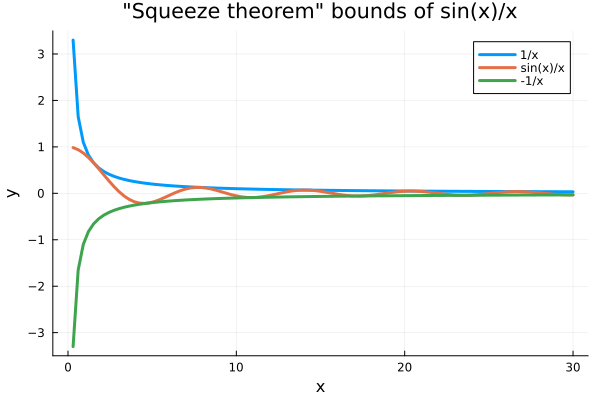

In [7]:
x = range(0, 30, length=100)
y1 = @. 1/x
y2 = @. sin(x)/x
y3 = @. -1/x
plot(x, [y1 y2 y3], title="\"Squeeze theorem\" bounds of sin(x)/x", 
label=["1/x" "sin(x)/x" "-1/x"], linewidth=3,
ylabel="y", xlabel="x")

Again, you can use `plot!` syntax and other `!` syntax as follows:

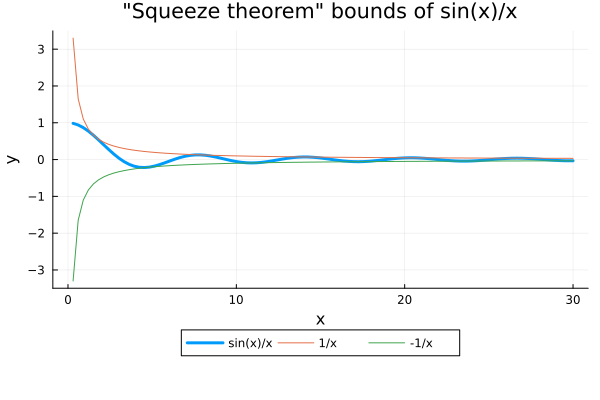

In [8]:
x = range(0, 30, length=100)
y1 = @. 1/x
y2 = @. sin(x)/x
y3 = @. -1/x
plot(x, y2, label="sin(x)/x", lw=[3 1])
plot!(x, [y1 y3], label=["1/x" "-1/x"])
plot!(legend=:outerbottom, legendcolumns=3)

title!("\"Squeeze theorem\" bounds of sin(x)/x")
ylabel!("y")
xlabel!("x")

Perhaps the most unsatisfying thing about this plot is how the positive bound is coloured red and vice versa. It may be helpful - although not required for this course - to consider how the reader may interpret your plots before publishing them.

## 2 - Random.jl

Random documentation: https://docs.julialang.org/en/v1/stdlib/Random/

### RNG?

Random.jl is a Julia package for random number generation (RNG). For our purposes, we will use this to generate test data. Let's initialize Random.jl:

In [9]:
using Random

`rand(S)` is a function that can pick a random element or array of elements from S. S can be
* a tuple
* a range (ie. a:b:c, a range from a to b with step size c)
* a type - for floats this will be `[0,1)`, for complex floats this will be `[0,1) + [0,1)*i`, and for integers this will be `typemin(S):typemax(S)`
* ... among other possible inputs

For example, if you run the following line, you will most likely get an extremely large (in magnitude!) integer:

In [10]:
rand(Int)

-1359258131565010166

However, if you run the following line:

In [11]:
rand(Float64)

0.37840504723527846

... you will get a 64-bit IEEE 754 number anywhere between 0 and 1 (non-inclusive of 1, of course). Keep in mind that it is possible to get the exact same number over and over again; we are dealing with discrete representations of real numbers!

Cards or dice?

In [12]:
rand(("Diamonds", "Clubs", "Hearts", "Spades"))

"Diamonds"

In [13]:
rand(1:6)

4

### Normal/Gaussian distributions

`randn(x)` generates a column of length x of normally (or Gaussian) distributed floats. The distribution is the standard normal distribution, which has a mean of 0 and variance of 1. Consequently, its standard deviation is also `sqrt(1) = 1`.

In [14]:
randn(10) # generate a vector with length 10 which has standard normally distributed floats

10-element Vector{Float64}:
 -1.5017745729717253
 -0.03734510559789267
 -0.9564355239868763
 -0.5606880365753897
 -0.5347301619786929
 -1.6329930714434324
 -0.7392017547832539
 -1.5774350214790676
  0.5565957668623419
  1.17294800673157

Of course, you can also transform randn such that you can have an output with a different distribution:

In [15]:
randn(10) .+ 2 # mean is now 2 by linearity of E[X]

10-element Vector{Float64}:
 2.105097419811223
 1.1665497930178934
 2.8698888590940888
 1.4692719720305383
 2.3686256441322917
 3.9947961917626547
 2.4222774100347353
 1.6065646041231307
 0.9057763750585315
 2.9721659251129

In [16]:
randn(10) .* 2 # Variance is now 4 since Var(2X) = 4*Var(X) = 4 -> std = 2

10-element Vector{Float64}:
  1.9343528652777666
 -1.4415949507347001
  1.3862064506830865
  0.20610363003658738
 -2.394898724295132
 -2.575652720408379
 -2.1131938645050985
 -2.6051497534891257
  2.274023729480752
  1.4412683469221006

The function `randn` can also produce random matrices if the matrix dimensions are given as a tuple.

In [17]:
print(randn((2,2)))

[1.2642884725704304 0.21999296283684208; 0.5124558463808438 0.025053197199108646]

### Pseudorandomness

To clarify, algorithms which generate random numbers are not in fact random number generators. They are called pseudorandom number generators (PRNGs) because you can predict the output of the so-called RNGs if you know the initial value that the algorithm uses - the **seed**. The sequence of numbers generated by the RNG is entirely dependent on the seed, which can give it cryptographic importance. Try setting a random seed as follows:

In [18]:
Random.seed!(1234)
rand(Float64)

0.32597672886359486

Then, run the bottom line five times. After you have done so, reset using the top line, then run the bottom line five more times. What do you notice?

In [19]:
rand(Float64)

0.5490511363155669

## 3 - Plots.jl histograms

When we are concerned with the **distribution** of numerical data (a **random variable**, for example), the data may be better visualized using histograms, which bucket values into discrete intervals, then plot y-values (rectangle height) based on frequency.

Let's put our Random.jl skills to work by plotting a Gaussian distribution on a histogram. We can start with n = 10 and use some string concatenation using `string()` to make our code customizable. At n = 20, we should not expect a plot that looks like a binomial distribution:

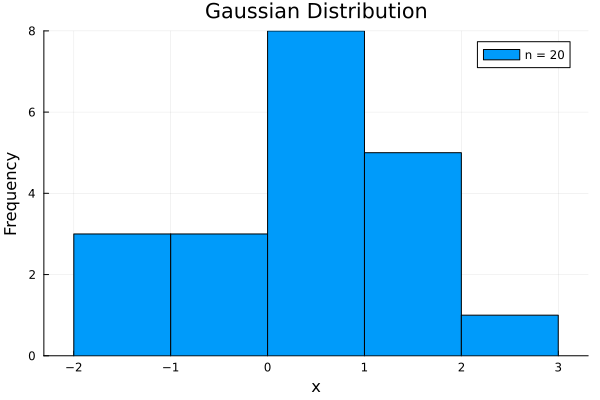

In [20]:
using Plots
using Random

n = 20
histogram(randn(n), label=string("n = ", n))
title!("Gaussian Distribution")
xlabel!("x")
ylabel!("Frequency")


We can compare this result with higher n numbers. Rather than splitting our final product into multiple plots, we can use the `layout=` attribute to arrange our **subplots** into one image:

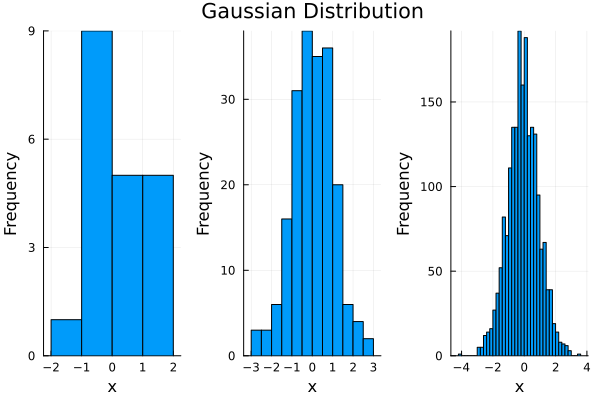

In [21]:
using Plots
using Random

n = 20
h1 = histogram(randn(n), label=string("n = ", n))
xlabel!("x")
ylabel!("Frequency")

n = 200
h2 = histogram(randn(n), label=string("n = ", n))
title!("Gaussian Distribution")
xlabel!("x")
ylabel!("Frequency")

n = 2000
h3 = histogram(randn(n), label=string("n = ", n))
xlabel!("x")
ylabel!("Frequency")

plot(h1, h2, h3, layout=(1,3), legend=false)

## 4 - Linear Algebra

For more information visit https://docs.julialang.org/en/v1/stdlib/LinearAlgebra/

### Matrix Rank

First, we initialize LinearAlgebra.jl:

In [22]:
using LinearAlgebra

The rank of a matrix is defined as the dimension of the column space. A quick way to find this number is to perform row-reduction on a matrix and count its pivots. However, the `rank(A)` command does not necessarily do this as it has its own dedicated algorithm for counting pivots which we do not need to know about. This algorithm works better than plain Gauss-Jordan elimination, as it was not devised with the intent of scientific computation.

Here are some examples of its usage:

In [23]:
rank([1 0 0; 0 1 0; 0 0 1]) # 3x3 identity matrix (trivial case)

3

In [24]:
rank([1 0 0; 0 1 0; 0 1 0]) # 3x3 identity matrix but last row is a multiple of the second

2

In [25]:
rank([1 0 0]) # vector

1

### Eigendecomposition

`eigen(A)` is a helpful command that gives you the eigenvalues and eigenvectors of a **square matrix** A.

In [26]:
eigentest = eigen([0 5 -10; 0 22 16; 0 -9 -2])
vals, vecs = eigentest
println(vals)
println(vecs)
println(eigentest.values)
println(eigentest.vectors)

[0.0, 9.999999894632879, 10.000000105367121]
[1.0 -0.7071067856568959 0.7071067767161991; 0.0 -0.56568541958482 0.565685430313656; 0.0 0.4242640684139052 -0.4242640690099516]
[0.0, 9.999999894632879, 10.000000105367121]
[1.0 -0.7071067856568959 0.7071067767161991; 0.0 -0.56568541958482 0.565685430313656; 0.0 0.4242640684139052 -0.4242640690099516]
